In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import cirpy as cp
import warnings
import category_encoders as ce
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

# Data wrangling 

In [212]:
# Importing the data from CSV file as a data frame

pd.set_option('display.max_columns', None)
full_data = pd.read_csv('ML_project_dataset.csv')
full_data

,Monomer A1 type,Monomer A2 type,A1/A2 ratio,"Monomer A concentration, wt%",Monomer B type,"Monomer B concentration, wt%",Organic solvent type,Additive X1 type in aqueous phase,"Additive X1 concentration, wt%",Additive X2 type in aqueous phase,"Additive X2 concentration, wt%",Aqueous phase pH,Additive Y type in organic phase,"Additive Y concentration, wt%",Nanomaterials type in aqueous phase,"Nanomaterials loading in aqueous phase, wt%",Nanomaterials type in organic phase,"Nanomaterials loading in organnic phase, wt%",Nanomateials morphology,"Polymerization time, s","Heat curing time, min","Heat curing termperature, degree",Substrate membrane type,substrate membrane pore size,"Transmembrane presurre, bar","NaCl concentration, ppm","MgSO4 concentratin, ppm","Na2SO4 concentration, ppm","MgCl2 concentration, ppm","CaCl2 Concentration, ppm","Permeability, LMH/bar","NaCl rejection, %","Mg2SO4 rejection, %","Na2SO4 rejection, %","MgCl2 rejection, %","CaCl2 rejection, %",Literature DOI
0,Piperazine,NaN,NaN,0.20,trimesoyl chloride (265.5),0.200,hexane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,NaN,25.0,1,NaN,2.0,1000.0,1000.0,1000.0,1000.0,NaN,7.5,NaN,87.0,86.0,10.0,NaN,10.1016/j.desal.2013.11.035
1,Piperazine,NaN,NaN,0.50,trimesoyl chloride (265.5),0.100,Isoparaphin-G,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,80.0,2,20.0,5.0,500.0,500.0,500.0,NaN,NaN,7.0,NaN,NaN,98.0,NaN,NaN,10.1016/j.memsci.2009.03.011
2,Piperazine,NaN,NaN,1.50,"3,3′,5,5′-biphenyl tetraacyl chloride (330.25)",0.100,Isoparaphin-G,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,80.0,2,20.0,5.0,500.0,500.0,500.0,NaN,NaN,4.0,NaN,NaN,92.5,NaN,NaN,10.1016/j.memsci.2009.03.011
3,Piperazine,NaN,NaN,1.00,"3,3′,5,5′-biphenyl tetraacyl chloride (330.25)",0.100,Isoparaphin-G,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,80.0,2,20.0,5.0,500.0,500.0,500.0,NaN,NaN,8.6,NaN,NaN,93.0,NaN,NaN,10.1016/j.memsci.2009.03.011
4,Piperazine,NaN,NaN,0.50,"3,3′,5,5′-biphenyl tetraacyl chloride (330.25)",0.100,Isoparaphin-G,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,80.0,2,20.0,5.0,500.0,500.0,500.0,NaN,NaN,10.3,65.0,92.0,95.0,NaN,NaN,10.1016/j.memsci.2009.03.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,Tannic acid,NaN,NaN,0.03,Isophorone diisocyanate (222.3),0.375,hexane,NaN,NaN,NaN,NaN,7.0,NaN,NaN,graphe oxide quantum dots,1.0,NaN,NaN,NaN,600.0,5.0,60.0,135,NaN,2.0,NaN,NaN,1000.0,NaN,NaN,11.5,NaN,NaN,57.1,NaN,NaN,doi.org/10.1021/acsami.6b12826
667,Triethanolamine,NaN,NaN,6.00,trimesoyl chloride (265.5),0.900,hexane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multi-walled carbon nanotube-COOH,0.5,NaN,NaN,tube,2100.0,30.0,60.0,92,NaN,6.0,NaN,NaN,710.0,NaN,NaN,3.7,NaN,NaN,70.0,NaN,NaN,doi.org/10.1016/j.memsci.2012.10.042
668,Triethanolamine,NaN,NaN,6.00,trimesoyl chloride (265.5),0.900,hexane,sodum dodecyl sulfate,0.3,NaN,NaN,NaN,NaN,NaN,multi-walled carbon nanotube-COOH,0.5,NaN,NaN,tube,2100.0,30.0,60.0,92,NaN,6.0,342.0,NaN,710.0,NaN,NaN,3.5,20.0,NaN,78.0,NaN,NaN,doi.org/10.1016/j.memsci.2012.10.042
669,Triethanolamine,NaN,NaN,6.00,trimesoyl chloride (265.5),0.900,hexane,Trixton x-100,0.3,NaN,NaN,NaN,NaN,NaN,multi-walled carbon nanotube-COOH,0.5,NaN,NaN,tube,2100.0,30.0,60.0,92,NaN,6.0,NaN,NaN,710.0,NaN,NaN,3.6,NaN,NaN,69.0,NaN,NaN,doi.org/10.1016/j.memsci.2012.10.042


In [213]:
# Selecting only wthe rows that have hexane as solvent and trimesoyl chloride as the monomer B

full_data = full_data[full_data['Monomer A2 type'].isnull()]
full_data = full_data[full_data['Additive X1 concentration, wt%'].isna()]
full_data = full_data[full_data['Nanomaterials type in aqueous phase'].isna()]
full_data = full_data[full_data['Nanomaterials type in organic phase'].isna()]
full_data = full_data.loc[full_data['Monomer B type'] == 'trimesoyl chloride (265.5)']
full_data = full_data.loc[full_data['Organic solvent type'] == 'hexane']
full_data = full_data.loc[full_data['Monomer A1 type'] == 'Piperazine']
full_data

,Monomer A1 type,Monomer A2 type,A1/A2 ratio,"Monomer A concentration, wt%",Monomer B type,"Monomer B concentration, wt%",Organic solvent type,Additive X1 type in aqueous phase,"Additive X1 concentration, wt%",Additive X2 type in aqueous phase,"Additive X2 concentration, wt%",Aqueous phase pH,Additive Y type in organic phase,"Additive Y concentration, wt%",Nanomaterials type in aqueous phase,"Nanomaterials loading in aqueous phase, wt%",Nanomaterials type in organic phase,"Nanomaterials loading in organnic phase, wt%",Nanomateials morphology,"Polymerization time, s","Heat curing time, min","Heat curing termperature, degree",Substrate membrane type,substrate membrane pore size,"Transmembrane presurre, bar","NaCl concentration, ppm","MgSO4 concentratin, ppm","Na2SO4 concentration, ppm","MgCl2 concentration, ppm","CaCl2 Concentration, ppm","Permeability, LMH/bar","NaCl rejection, %","Mg2SO4 rejection, %","Na2SO4 rejection, %","MgCl2 rejection, %","CaCl2 rejection, %",Literature DOI
0,Piperazine,NaN,NaN,0.20,trimesoyl chloride (265.5),0.200,hexane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,NaN,25.0,1,NaN,2.0,1000.0,1000.0,1000.0,1000.0,NaN,7.50,NaN,87.0,86.0,10.0,NaN,10.1016/j.desal.2013.11.035
15,Piperazine,NaN,NaN,0.20,trimesoyl chloride (265.5),0.100,hexane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,10.0,100.0,5,500.0,10.3,1000.0,1000.0,1000.0,NaN,NaN,9.17,44.6,84.6,NaN,NaN,NaN,10.1016/j.desal.2014.05.007
16,Piperazine,NaN,NaN,0.20,trimesoyl chloride (265.5),0.100,hexane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,10.0,100.0,6,200.0,10.3,1000.0,1000.0,1000.0,NaN,NaN,5.65,35.3,87.0,NaN,NaN,NaN,10.1016/j.desal.2014.05.007
17,Piperazine,NaN,NaN,0.20,trimesoyl chloride (265.5),0.100,hexane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,10.0,100.0,7,100.0,10.3,1000.0,1000.0,1000.0,NaN,NaN,2.48,47.8,92.3,NaN,NaN,NaN,10.1016/j.desal.2014.05.007
18,Piperazine,NaN,NaN,2.00,trimesoyl chloride (265.5),0.300,hexane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,5.0,60.0,8,NaN,5.0,1000.0,1000.0,1000.0,NaN,NaN,4.00,NaN,87.5,95.0,NaN,NaN,10.1016/j.desal.2013.08.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Piperazine,NaN,NaN,1.50,trimesoyl chloride (265.5),0.300,hexane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,10.0,60.0,118,NaN,4.0,2000.0,2000.0,2000.0,2000.0,2000.0,3.13,14.0,81.0,78.0,25.0,16.0,10.1016/j.memsci.2020.118064
303,Piperazine,NaN,NaN,1.50,trimesoyl chloride (265.5),0.300,hexane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,10.0,60.0,132,NaN,4.0,2000.0,2000.0,2000.0,2000.0,2000.0,1.50,8.0,85.0,82.0,83.0,55.0,10.1016/j.memsci.2020.118064
313,Piperazine,NaN,NaN,0.35,trimesoyl chloride (265.5),0.300,hexane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,15.0,50.0,122,35.0,6.0,1000.0,1000.0,1000.0,1000.0,NaN,3.80,35.0,96.0,98.0,42.0,NaN,10.1016/j.memsci.2018.11.019
315,Piperazine,NaN,NaN,0.35,trimesoyl chloride (265.5),0.300,hexane,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,15.0,50.0,125,35.0,6.0,1000.0,1000.0,1000.0,1000.0,NaN,5.50,30.0,84.0,98.0,48.0,NaN,10.1016/j.jiec.2018.05.032


In [214]:
data = full_data[['Monomer A1 type', 'Monomer A concentration, wt%', 'Monomer B concentration, wt%', 'Polymerization time, s', 'Heat curing termperature, degree', 'NaCl concentration, ppm', 'Na2SO4 concentration, ppm', 'Transmembrane presurre, bar', 'Na2SO4 rejection, %', 'NaCl rejection, %', 'Permeability, LMH/bar']]
data = pd.concat([data, data, data], axis = 0, ignore_index=True)
data = data.dropna()
# data = data.append(data)
# data = data.append(data)
data.shape

(90, 11)

In [215]:
# Segregating into categorical features, numeric features and targets

features = data[['Monomer A concentration, wt%', 'Monomer B concentration, wt%',  'Polymerization time, s', 'Heat curing termperature, degree', 'NaCl concentration, ppm', 'Transmembrane presurre, bar']]
targets = data[['NaCl rejection, %', 'Permeability, LMH/bar']]

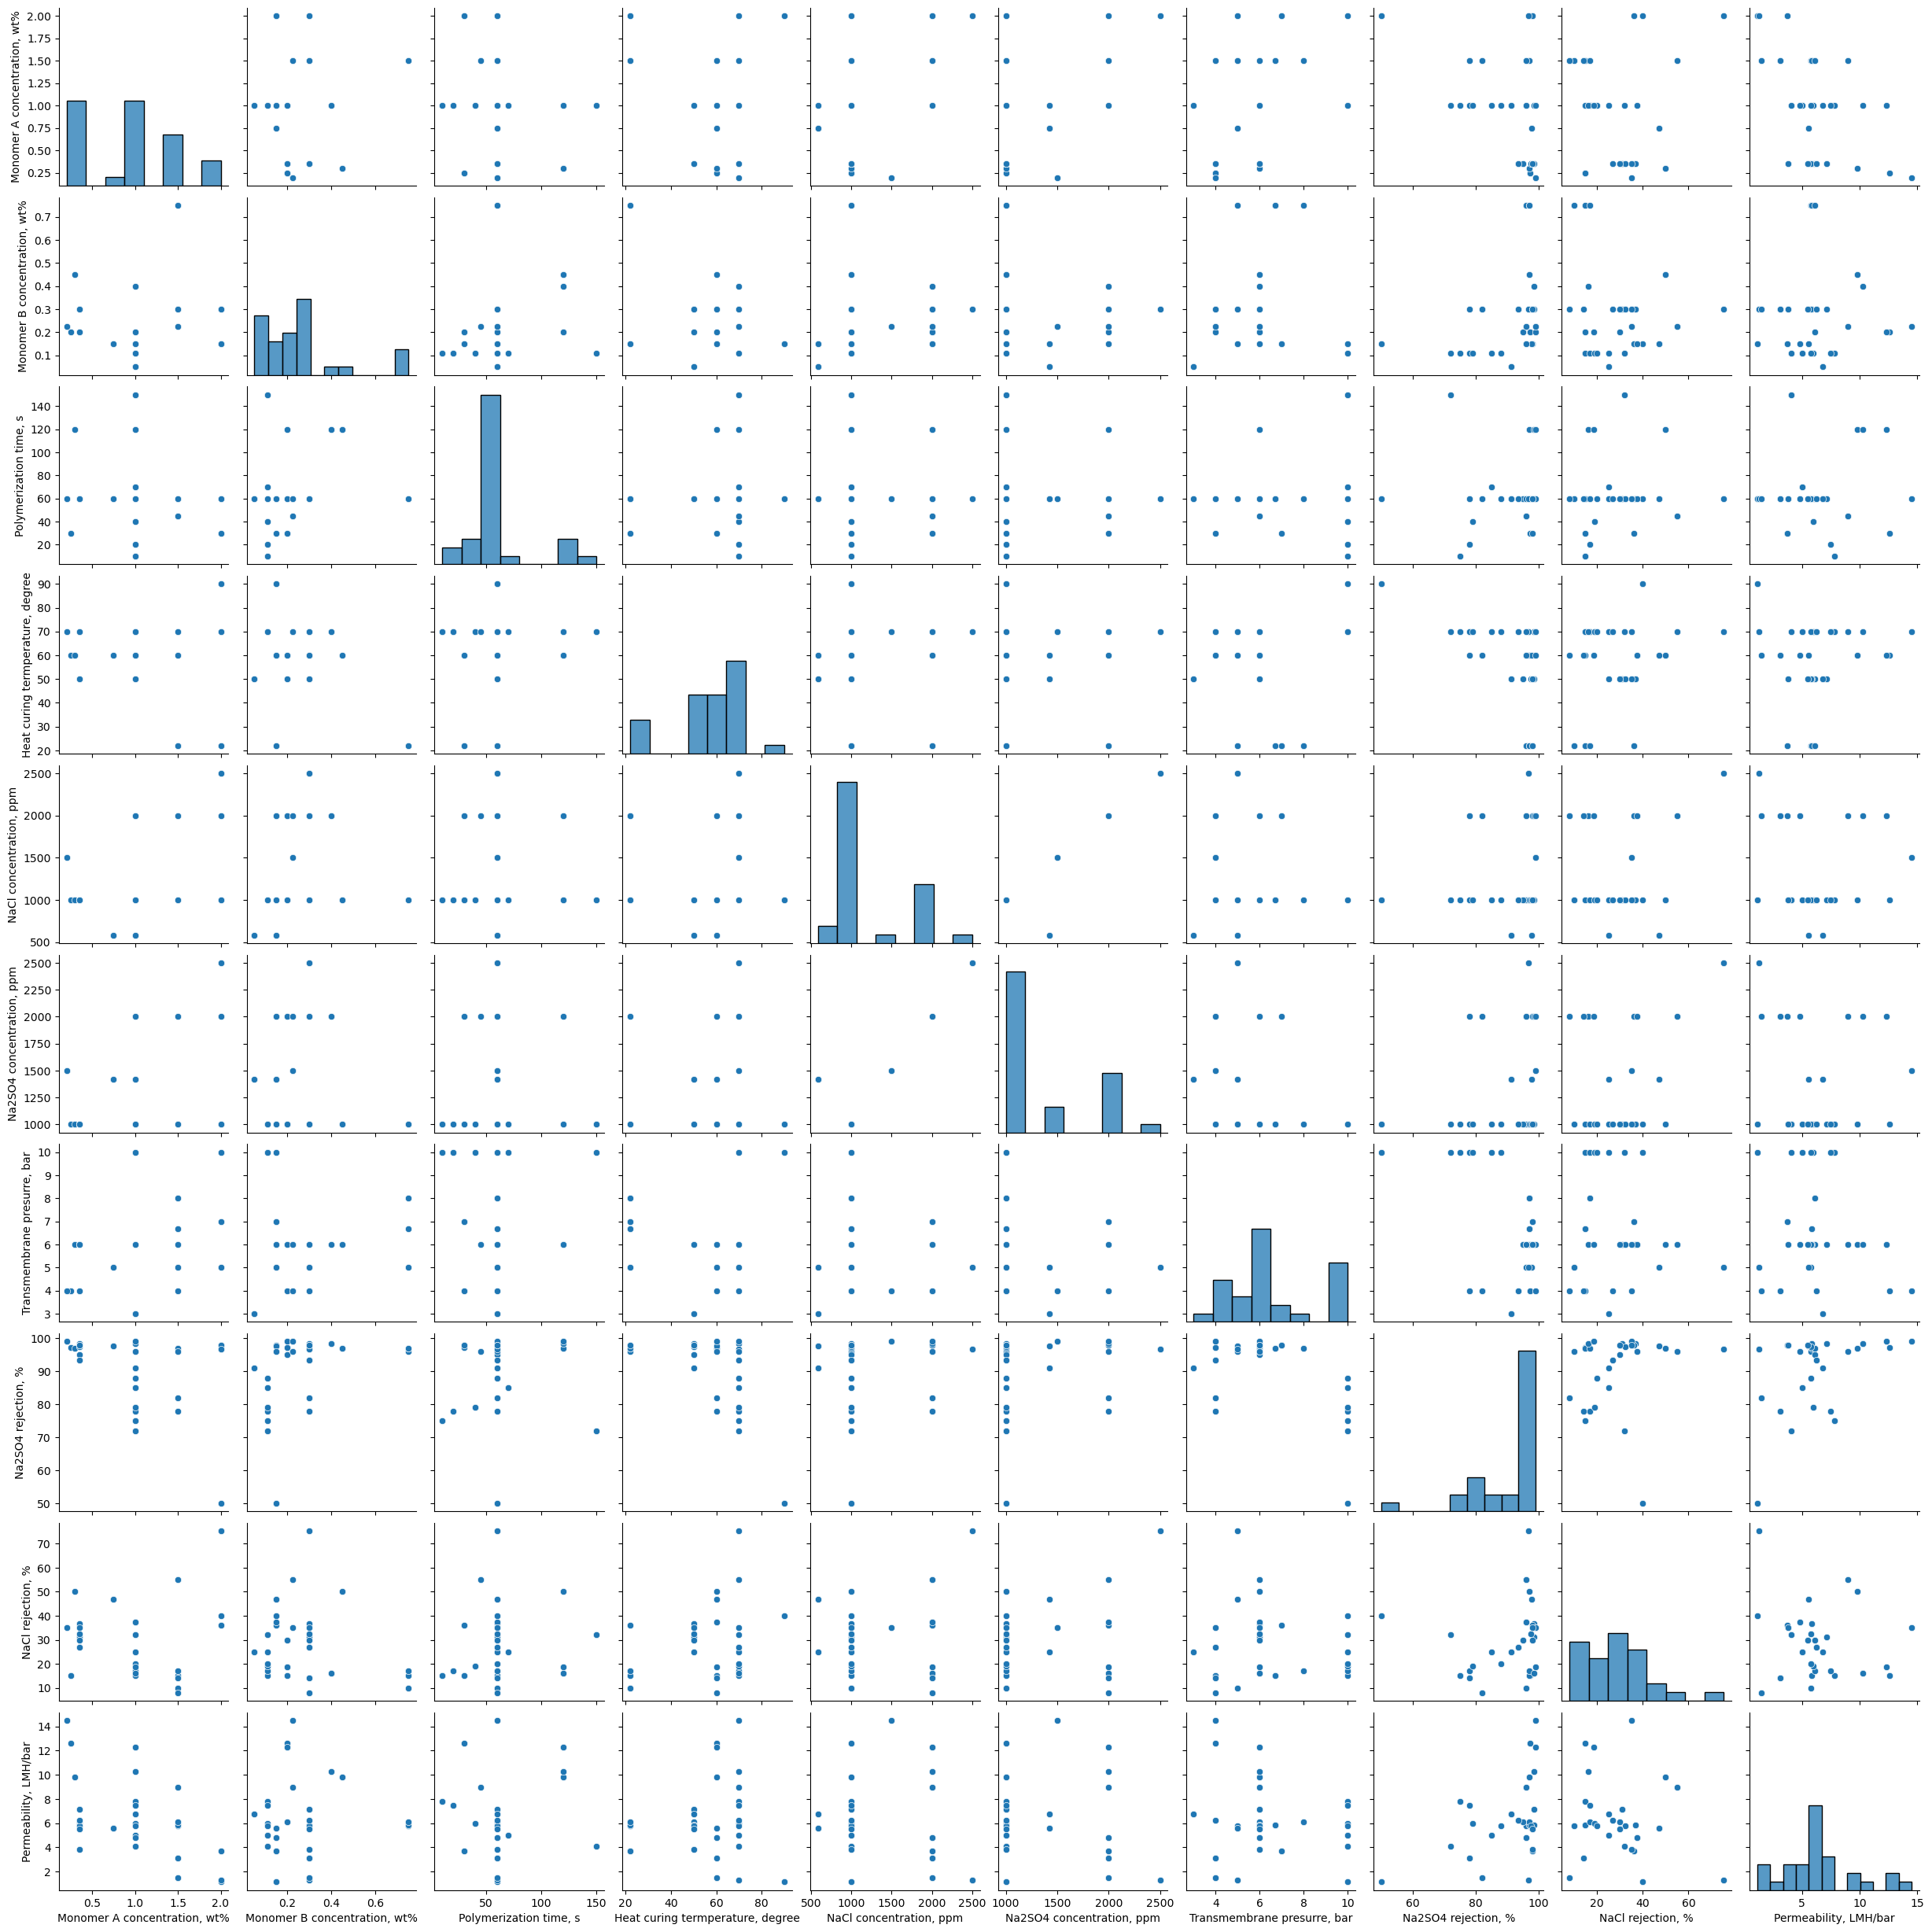

In [216]:
sns.pairplot(data)

In [217]:
features

,"Monomer A concentration, wt%","Monomer B concentration, wt%","Polymerization time, s","Heat curing termperature, degree","NaCl concentration, ppm","Transmembrane presurre, bar"
10,0.25,0.200,30.0,60.0,1000.0,4.0
13,0.30,0.450,120.0,60.0,1000.0,6.0
20,1.50,0.750,60.0,22.0,1000.0,5.0
21,1.50,0.750,60.0,22.0,1000.0,6.7
22,1.50,0.750,60.0,22.0,1000.0,8.0
...,...,...,...,...,...,...
193,1.50,0.300,60.0,60.0,2000.0,4.0
194,1.50,0.300,60.0,60.0,2000.0,4.0
195,0.35,0.300,60.0,50.0,1000.0,6.0
196,0.35,0.300,60.0,50.0,1000.0,6.0


In [218]:
targets

,"NaCl rejection, %","Permeability, LMH/bar"
10,15.0,12.600000
13,50.0,9.800000
20,10.0,5.800000
21,15.0,5.820896
22,17.0,6.125000
...,...,...
193,14.0,3.130000
194,8.0,1.500000
195,35.0,3.800000
196,30.0,5.500000


In [219]:
# # Number and names of monomers
# cat_fea = categorical_features['Monomer A1 type'].unique()
# cat_fea

In [220]:
# # create object of Ordinalencoding
# encoder = {"Monomer A1 type": {"Piperazine":0, "Ethanimine":1, "Polyethyleneimine":2,
#        "2-Amino-1, 3-propanediol ":3, "Pentaerythritol":4, "Polyamidoamine":5,
#        "Potassium 2,5-bis(4-aminophenoxy)- benzenesulfonate":6,
#        "Triethanolamine":7, "Glucouse":8, "2,2′-Oxybis-ethylamine":9,
#        "3,5-diaminobenzoylpiperazine":10, "4-aminobenzoylpiperazine":11,
#        "1,4-Diaminocyclohexane":12,
#        "2,2 0-bis(1-hydroxyl-1-trifluoromethyl-2,2,2-trifluo-roethyl)-4,4'-methylenedianiline":13,
#        "Tannic acid":14}}
# data = data.replace(encoder)
# features = pd.concat([categorical_features, numeric_features], axis=1)
# features = features.replace(encoder)
# display(features.to_string())

In [221]:
features.shape

(90, 6)

In [222]:
features.dtypes

Monomer A concentration, wt%        float64
Monomer B concentration, wt%        float64
Polymerization time, s              float64
Heat curing termperature, degree    float64
NaCl concentration, ppm             float64
Transmembrane presurre, bar         float64
dtype: object

In [223]:
# features.astype('float').dtypes

In [224]:
targets.dtypes

NaCl rejection, %        float64
Permeability, LMH/bar    float64
dtype: object

# Data visualization

In [225]:
feature_names = list(features.columns)
target_names = list(targets.columns)

In [226]:
# for i in range(7):
#     for j in range(3):
#         plt.scatter(features[feature_names[i]], targets[target_names[j]])
#         plt.xlabel(feature_names[i])
#         plt.ylabel(target_names[j])
#         plt.show()

In [227]:
# sns.pairplot(data)

In [228]:
X = features.to_numpy()
y = targets.to_numpy()

In [229]:
# X = np.delete(X, 3, 1)

# Neural network regression

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.005
Epoch 1/72
2/2 [==============================] - 0s 86ms/step - loss: 641727.6875 - mse: 26777.1016 - val_loss: 418079.0000 - val_mse: 14212.1357
Epoch 2/72
2/2 [==============================] - 0s 18ms/step - loss: 251626.6875 - mse: 7896.6606 - val_loss: 114803.7969 - val_mse: 3908.5869
Epoch 3/72
2/2 [==============================] - 0s 19ms/step - loss: 95014.3828 - mse: 3364.4778 - val_loss: 34104.7500 - val_mse: 1158.2114
Epoch 4/72
2/2 [==============================] - 0s 18ms/step - loss: 24552.6914 - mse: 803.9840 - val_loss: 70845.3047 - val_mse: 2401.6040
Epoch 5/72
2/2 [==============================] - 0s 18ms/step - loss: 49216.6914 - mse: 1705.6664 - val_loss: 11401.9463 - val_mse: 379.0111
Epoch 6/72
2/2 [==============================] - 0s 19ms/step - loss: 8599.7461 - mse: 313.8430 - val_loss: 29742.2988 - val_mse: 1010.9490
Epoch 7/72
2/2 [==============================] - 0s 19ms/step -

Epoch 59/72
2/2 [==============================] - 0s 18ms/step - loss: 2916.1489 - mse: 107.6540 - val_loss: 2984.7341 - val_mse: 97.0175
Epoch 60/72
2/2 [==============================] - 0s 17ms/step - loss: 3443.1384 - mse: 119.4830 - val_loss: 3838.1501 - val_mse: 123.0769
Epoch 61/72
2/2 [==============================] - 0s 19ms/step - loss: 3246.3425 - mse: 115.7117 - val_loss: 5090.1660 - val_mse: 163.7041
Epoch 62/72
2/2 [==============================] - 0s 19ms/step - loss: 3370.8818 - mse: 116.6047 - val_loss: 2975.8972 - val_mse: 96.9327
Epoch 63/72
2/2 [==============================] - 0s 19ms/step - loss: 3559.1638 - mse: 119.5514 - val_loss: 4305.8379 - val_mse: 138.1922
Epoch 64/72
2/2 [==============================] - 0s 18ms/step - loss: 3092.3440 - mse: 110.8840 - val_loss: 4006.4583 - val_mse: 128.5560
Epoch 65/72
2/2 [==============================] - 0s 18ms/step - loss: 3138.2712 - mse: 108.0588 - val_loss: 3189.8350 - val_mse: 102.9058
Epoch 66/72
2/2 [=====

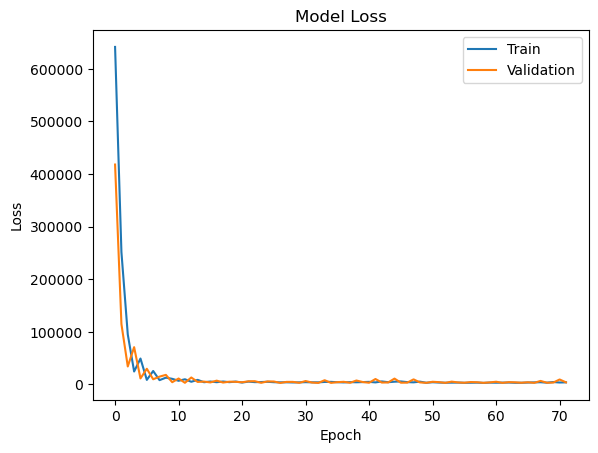

[16.448053  7.393636] ==> [35.   3.8]
[27.464815 13.661616] ==> [16.19 10.3 ]
[15.463445  8.029276] ==> [17.   7.5]
[15.463445  8.029276] ==> [17.   7.5]
[16.448053  7.393636] ==> [36.8   5.87]
[16.448053  7.393636] ==> [31.    7.12]
[27.464815 13.661616] ==> [16.19 10.3 ]
[16.448053  7.393636] ==> [35.   3.8]
[19.548662  8.061868] ==> [27.    6.25]
[10.409909 11.868299] ==> [36.   3.7]
[19.439272 13.136497] ==> [8.  1.5]
[12.042551  6.444135] ==> [10.   5.8]
[19.439272 13.136497] ==> [8.  1.5]
[12.090715   6.4620194] ==> [15.          5.82089552]
[12.090715   6.4620194] ==> [15.          5.82089552]
[10.409909 11.868299] ==> [36.   3.7]
[14.764223  7.62841 ] ==> [15.  12.6]
[27.464815 13.661616] ==> [16.19 10.3 ]
[10.409909 11.868299] ==> [36.   3.7]
[12.042551  6.444135] ==> [10.   5.8]
[17.597048  8.087539] ==> [19.  6.]
[16.448053  7.393636] ==> [32.5   5.75]
[25.880669 13.319718] ==> [18.6 12.3]
[21.778894 16.199203] ==> [75.3   1.26]
[14.764223  7.62841 ] ==> [15.  12.6]
[15.7754

In [245]:
hidden_layers = [3]
units_per_layer = [128]
learning_rates = [0.005]

R2 = []
Loss = []

for hidden_layer in hidden_layers:
    for units in units_per_layer:
        for learning_rate in learning_rates:
            
            print("No. of hidden layers =", hidden_layer)
            print("No. of units per layer =", units)
            print("Learning rate =", learning_rate)
           
            model = Sequential()
            model.add(Dense(units, activation='relu', input_shape=[X.shape[1]]))
            
            for i in range(hidden_layer - 1):
                model.add(Dense(units, activation='relu'))
            model.add(Dense(y.shape[1]))
            opt = keras.optimizers.Adam(learning_rate=learning_rate)
            mse = tf.keras.losses.MeanSquaredError(reduction=
            tf.keras.losses.Reduction.SUM)
            model.compile(loss=mse, optimizer=opt, metrics=['mse'])
            history = model.fit(X_train,y_train,
            validation_data=(X_test, y_test),
                        epochs=72)
            loss = model.evaluate(X_test,y_test, verbose=0)
            predictions = model.predict(X_test)
            predictions_train = model.predict(X_train)
                
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model Loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validation'], loc='upper right')
            plt.show()
                
                
#                 plt.plot(X_test[:,0],y_test[:,0])
#                 plt.plot(X_test[:,0],predictions[:,0])
#                 plt.ylabel('Loss')
#                 plt.xlabel('monomer type')
#                 plt.legend(['Predicted', 'Actual'], loc='upper right')
#                 plt.show()
                
#                 A = history.history['accuracy']
#                 Final_accuracy = A[-1:][0]
#                 Accuracy.append(Final_accuracy)
        
            B = history.history['loss']
            Final_loss = B[-1:][0]
            Loss.append(Final_loss)               
                
            size = y_test.shape[0]
            for i in range(size):
                    print(predictions[i,:], "==>", y_test[i,:])
                    
            r2 = r2_score(predictions, y_test)     

-7.013659275717432

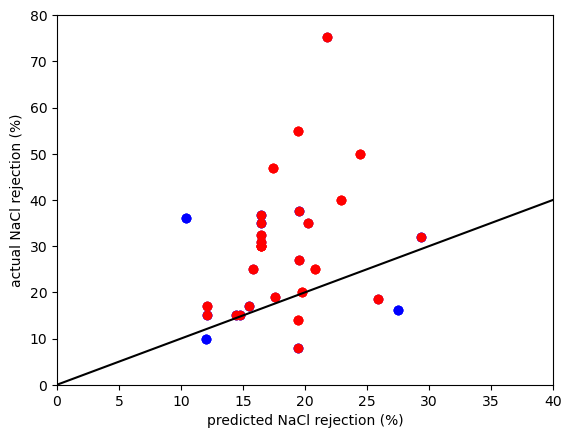

In [258]:
x = np.linspace(0, 50, 100)
plt.plot(x, x, color = 'black');
plt.scatter(predictions[:,0], y_test[:,0], color = 'blue')
plt.scatter(predictions_train[:,0], y_train[:,0], color = 'red')
plt.ylabel('actual NaCl rejection (%)')
plt.xlabel('predicted NaCl rejection (%)')
plt.xlim([0, 40])
plt.ylim([0, 80])
r2 = r2_score(predictions[:,0], y_test[:,0])  
r2

-2.310057440654099

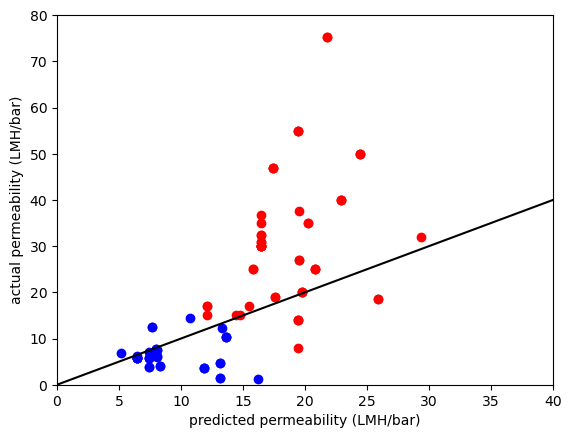

In [259]:
x = np.linspace(0, 50,100)
plt.plot(x, x, color = 'black');
plt.scatter(predictions[:,1], y_test[:,1], color = 'blue')
plt.scatter(predictions_train[:,0], y_train[:,0], color = 'red')
plt.ylabel('actual permeability (LMH/bar)')
plt.xlabel('predicted permeability (LMH/bar)')
plt.xlim([0, 40])
plt.ylim([0, 80])
r2 = r2_score(predictions[:,1], y_test[:,1])  
r2